In [1]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import datetime
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Load

In [2]:
def load_data(path, rows = 300000):
    """
    Load the training data
    rows --> maximum number of rows to load from the dataset

    """
    data = pd.read_csv(path, header=None, sep=',')
    data = data.drop_duplicates()
    data = data.sample(frac = 1)
    data = data.reset_index(drop=True)
    data = data[:rows]
    
    data.columns = ['B1', 'C1', 'A2', 'B2', 'C2', 'ma_B1', 'ma_C1', 'ma_A2', 'ma_B2', 'ma_C2']
#     data.columns = ['B1', 'C1', 'A2', 'B2', 'C2']
#     data = data[['B1', 'C1']]
    data = data.drop_duplicates()
    data = data.sample(frac = 1)
    data = data.reset_index(drop=True)
    
    return data

In [3]:
# X = np.array([[1, 4, 2], [2, 40, 2], [2, 4, 3], [200, 4, 2], [200, 5, 2], [200, 4, 3], [8, 4, 7], [80, 4, 8], [2, 4, 8]])

file_path  = r'C:\Users\Gor\Desktop\New_experiments\Important_files-3\DATA\newerrrr_DATA\HT_c^100\my_training_data.txt'
# file_path  = r'G:\DATAcomplete3.TXT'
train_data = load_data(file_path, rows = 325000)
X = np.r_[train_data]

In [4]:
X.shape

(325000, 10)

# Plot

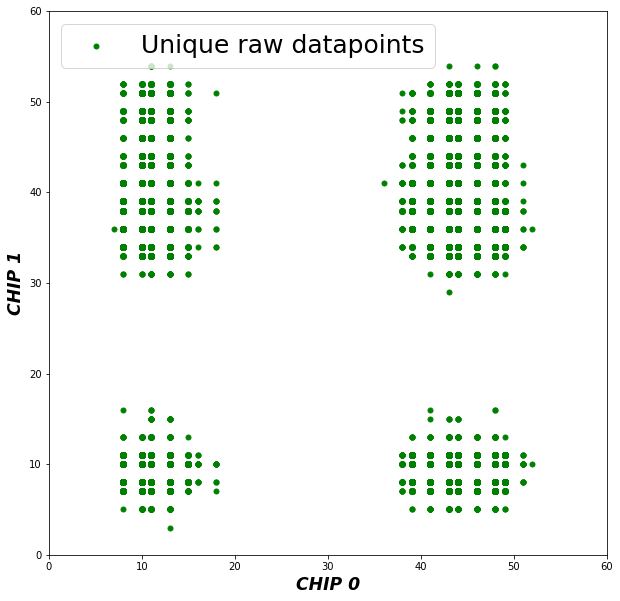

In [5]:
plt.figure(figsize=(10,10))

column1 = 0
column2 = 1

data = plt.scatter(X[:, column1], X[:, column2], c='green', s=25, edgecolors='green')
# HT = plt.scatter(X_outliers[:, column1], X_outliers[:, column2], c='red', s=1, edgecolors='red')

plt.axis('tight')
plt.xlim((0, 60))
plt.ylim((0, 60))

plt.legend([data], ["Unique raw datapoints"], loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=25))

# plt.xlabel(
#     "Errors train: %d/%d ; "
#     "Errors novel regular: %d/%d ; "
#     "Errors novel abnormal: %d/%d"
#     % (n_error_train, n_train_rows ,n_error_test, n_test_rows, n_error_outliers, n_outliers_rows))
plt.xlabel("CHIP {}".format(column1), fontsize='xx-large', fontstyle='oblique', fontweight='bold')
plt.ylabel("CHIP {}".format(column2), fontsize='xx-large', fontstyle='oblique', fontweight='bold')

plt.show()

# Find edge points ----------------------------------------------------

In [6]:
clustering = DBSCAN(eps=5, min_samples=60).fit(X)

In [7]:
clustering

DBSCAN(eps=5, min_samples=60)

In [8]:
labels = clustering.labels_
labels
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [9]:
# core indexes
core_ind = clustering.core_sample_indices_
# core_ind

In [10]:
# clustering.components_

In [11]:
# X[core_ind]

In [12]:
# all indexes
arr1 = np.arange(len(X))
# arr1
len(X)

325000

In [13]:
arr2 = labels!=-1
# arr2

In [14]:
# edge and noise indexes
arr3 = np.setdiff1d(arr1,core_ind)
# arr3

In [15]:
# edge indexes

# edge_ind = [idx for idx in arr3 if arr2[idx]==True]
edge_ind = [idx for idx in arr3 if clustering.labels_[idx]!= -1]
print(len(edge_ind))

# noise indexes
noise_ind = [idx for idx in arr3 if clustering.labels_[idx] == -1]

print(len(noise_ind))

6195
1223


In [16]:
X_edge = X[edge_ind]
X_noise = X[noise_ind]

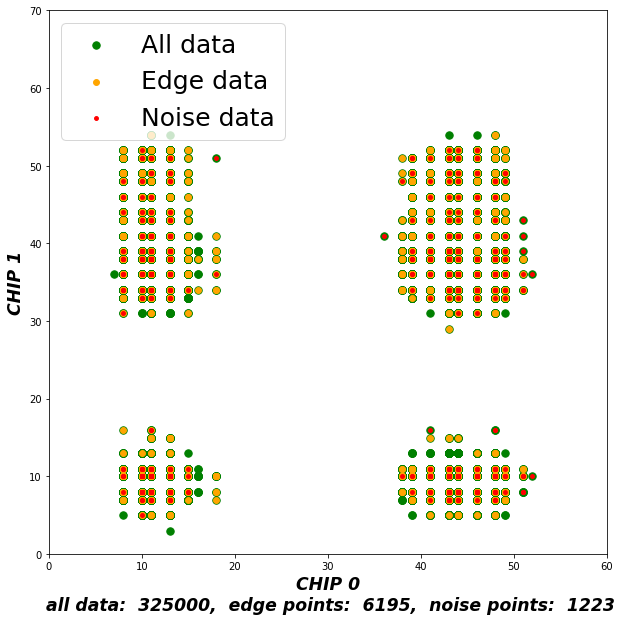

In [17]:
plt.figure(figsize=(10,10))

column1 = 0
column2 = 1

data = plt.scatter(X[:, column1], X[:, column2], c='green', s=55, edgecolors='green')
edge_data = plt.scatter(X_edge[:, column1], X_edge[:, column2], c='orange', s=35, edgecolors='orange')
noise_data = plt.scatter(X_noise[:, column1], X_noise[:, column2], c='red', s=15, edgecolors='red')
# HT = plt.scatter(X_outliers[:, column1], X_outliers[:, column2], c='red', s=1, edgecolors='red')

plt.axis('tight')
plt.xlim((0, 60))
plt.ylim((0, 70))

plt.legend([data, edge_data, noise_data], ["All data", "Edge data", "Noise data"], loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=25))

plt.xlabel("CHIP {}\n all data:  {},  edge points:  {},  noise points:  {}".format(column1, len(X), len(edge_ind), len(noise_ind)), fontsize='xx-large', fontstyle='oblique', fontweight='bold')
plt.ylabel("CHIP {}".format(column2), fontsize='xx-large', fontstyle='oblique', fontweight='bold')

plt.show()

In [18]:
X_edge

array([[ 13. ,  36. , 259. , ..., 262.6,  32.4,  30.6],
       [ 46. ,  33. , 257. , ..., 259.6,  40.8,  40. ],
       [ 46. ,  49. , 261. , ..., 261.4,  30.6,  34. ],
       ...,
       [ 10. ,  13. , 261. , ..., 262.2,  37.4,  33. ],
       [ 43. ,  49. , 262. , ..., 263.4,  30.2,  33.4],
       [ 11. ,  10. , 267. , ..., 265. ,  39.4,  36.8]])

In [19]:
np.savetxt('Edge_points.txt', X_edge, fmt='%4.2f', delimiter=',')